In [ ]:
!curl -L "https://public.roboflow.com/ds/6DzkFcST6M?key=MoFOUrVq2K" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   894  100   894    0     0    453      0  0:00:01  0:00:01 --:--:--   453
100 11.5M  100 11.5M    0     0  3413k      0  0:00:03  0:00:03 --:--:-- 21.4M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: export/
   creating: export/images/
 extracting: export/images/raccoon-100_jpg.rf.YWIftfgUdZqJLTkvI9W2.jpg  
 extracting: export/images/raccoon-101_jpg.rf.ebfr15yC06H7KdSNWJkC.jpg  
 extracting: export/images/raccoon-102_jpg.rf.Vtizg4N4D1Wn9fv4sBaJ.jpg  
 extracting: export/images/raccoon-103_jpg.rf.yx4ScGFA2FZ23qfitAfV.jpg  
 extracting: export/images/raccoon-104_jpg.rf.HdpZVmq1teO4b2ny0HJO.jpg  
 extracting: export/images/raccoon-105_jpg.rf.S4P0w34qeFrLIhNIHmuD.jpg  
 extracting: export/images/raccoon-106_jpg.rf.UCuMtEoBFF5lvb

In [ ]:
%cd /content/yolov5

/content/yolov5


In [ ]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 14944, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 14944 (delta 2), reused 1 (delta 0), pack-reused 14936
Receiving objects: 100% (14944/14944), 13.99 MiB | 8.10 MiB/s, done.
Resolving deltas: 100% (10269/10269), done.


In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.8 MB/s eta 0:00:00


In [ ]:
%cd /

/


In [ ]:
from glob import glob

img_list = glob('/content/dataset/export/images/*.jpg')

In [ ]:
img_list[0]

'/content/dataset/export/images/raccoon-17_jpg.rf.LSzSuKkifGMSU8hDAB5h.jpg'

In [ ]:
from sklearn.model_selection import train_test_split

train_img, val_img = train_test_split(img_list, test_size = 0.2)

len(train_img), len(val_img)

(156, 40)

In [ ]:
with open('/content/dataset/train.txt', 'w') as f:
  f.write('\n'.join(train_img)+'\n')

In [ ]:
with open('/content/dataset/val.txt', 'w') as f:
  f.write('\n'.join(train_img)+'\n')

In [ ]:
import yaml

with open('/content/dataset/data.yaml') as f:
  data = yaml.load(f, Loader = yaml.FullLoader)
print(data)

{'train': '/content/dataset/train', 'val': '/content/dataset/valid', 'nc': 1, 'names': ['raccoon']}


In [ ]:
data['train'] = '/content/dataset/train.txt'
data['val'] = '/content/dataset/val.txt'

with open('/content/dataset/data.yaml','w') as f:
  yaml.dump(data, f)

In [ ]:
%cd /content/yolov5

/content/yolov5


In [ ]:
!python train.py --img 416 --batch 16 --epochs 50 --data /content/dataset/data.yaml --cfg /content/yolov5/models/yolov5s.yaml --weight yolov5s.pt --name racoon_yolov5s

train: weights=yolov5s.pt, cfg=/content/yolov5/models/yolov5s.yaml, data=/content/dataset/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=racoon_yolov5s, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-61-gcaba2ae Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anc

In [29]:
from IPython.display import Image
import os

val_img_path = val_img[1]
print(val_img_path)

/content/dataset/export/images/raccoon-139_jpg.rf.YuOi6NoWDJZngmRFa2yO.jpg


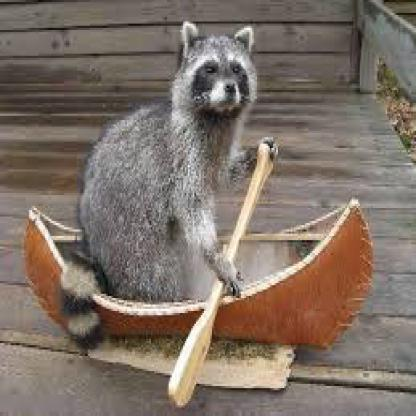

In [30]:
Image(val_img_path)

In [33]:
!python detect.py --weights /content/yolov5/runs/train/racoon_yolov5s/weights/best.pt --save-txt --img 416 --conf 0.5 --source "{val_img_path}"

# conf는 예를들어 0.5라고 기입하면, 0.5이상 확률로 판단한 것만 라쿤이라고 판단한다.

detect: weights=['/content/yolov5/runs/train/racoon_yolov5s/weights/best.pt'], source=/content/dataset/export/images/raccoon-139_jpg.rf.YuOi6NoWDJZngmRFa2yO.jpg, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-61-gcaba2ae Python-3.8.16 torch-1.13.0+cu116 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/dataset/export/images/raccoon-139_jpg.rf.YuOi6NoWDJZngmRFa2yO.jpg: 416x416 1 raccoon, 8.1ms
Speed: 0.4ms pre-process, 8.1ms inference, 1.7ms NMS per image at shape (1, 3, 416, 416)
Results saved to runs/detect/exp
1 labels saved to runs/detect/ex